In [116]:
import pandas as pd

DATASETS = ['2021-02-gasolina-etanol.csv', '2021-03-gasolina-etanol.csv', '2021-04-gasolina-etanol.csv',
    '2021-05-gasolina-etanol-1.csv', '2021-06-gasolina-etanol.csv', '2021-07-gasolina-etanol.csv']
MONTHS = ['FEVEREIRO', 'MARÇO', 'ABRIL', 'MAIO', 'JUNHO', 'JULHO']

In [26]:
def fitlerDataset(dataset, collum, value):
    '''
    Return a new dataset filtred the collum by the value given
    '''
    return dataset[dataset[collum] == value]


In [118]:
def getMaxPriceByState():
    '''
    Get the max gasolin price in 2021 year by state
    '''
    datatojoin = []
    
    for dataset in DATASETS:
        datatojoin.append(pd.read_csv('datasets/' + dataset, ';'))

    dataset = pd.concat(datatojoin)
    dataset = fitlerDataset(dataset, 'Produto', 'GASOLINA')
    states = set(dataset['Estado - Sigla'])
    result = {}

    for state in states:
        filtredData = fitlerDataset(dataset, 'Estado - Sigla', state)
        result[state] = filtredData['Valor de Venda'].apply(lambda x: float(x.replace(',', '.'))).max()
    
    return result
print(getMaxPriceByState())

{'SE': 5.999, 'ES': 6.905, 'RN': 6.499, 'MG': 6.997, 'PI': 6.499, 'SC': 6.139, 'MS': 6.33, 'AP': 5.7, 'PE': 6.429, 'MT': 6.537, 'AM': 6.05, 'TO': 6.23, 'BA': 6.499, 'RR': 5.65, 'DF': 6.299, 'MA': 6.23, 'GO': 6.65, 'RJ': 6.96, 'PB': 5.93, 'RO': 6.34, 'RS': 6.999, 'PA': 6.659, 'AC': 6.99, 'PR': 6.35, 'AL': 6.599, 'CE': 6.35, 'SP': 6.499}


C:\Users\carlo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


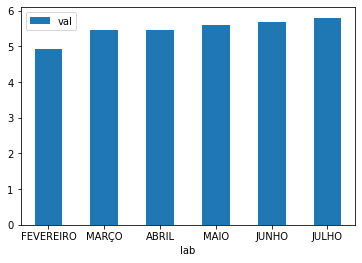

In [119]:
def getMeanPriceByMonth():
    '''
    Get the mean of gasoline price dived by month in 2021
    '''
    means = []

    for dataset in DATASETS:
        monthdataset = pd.read_csv('datasets/' + dataset, ';')
        filtred = fitlerDataset(monthdataset, 'Produto', 'GASOLINA')
        filtred['Valor de Venda'] = filtred['Valor de Venda'].apply(lambda x: float(x.replace(',', '.')))
        means.append(filtred['Valor de Venda'].mean())
    
    df = pd.DataFrame({'lab':MONTHS, 'val':means})
    ax = df.plot.bar(x='lab', y='val', rot=0)
    
getMeanPriceByMonth()

In [122]:
def getCitys():
    dataset = pd.read_csv('datasets/2021-04-gasolina-etanol.csv', ';')
    etanolDataset = fitlerDataset(dataset, 'Produto', 'ETANOL')
    gasolineDataset = fitlerDataset(dataset, 'Produto', 'GASOLINA')
    points = set(dataset['CNPJ da Revenda'])

    for point in ponts:
        print(etanoldataset['CNPJ da Revenda'] == point)
        print(gasolineDataset['CNPJ da Revenda'] == point)
        return
    display(etanolDataset)
    display(gasolineDataset)

getCitys()

,Região - Sigla,Estado - Sigla,Município,Revenda,CNPJ da Revenda,Nome da Rua,Número Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
6,NE,BA,ITABUNA,PEIXOTO PRODUTOS DE PETROLEO LTDA,32.609.778/0001-99,AVENIDA JURACY MAGALHAES,782,TERREO,FATIMA,45603-530,ETANOL,01/04/2021,"4,59",NaN,R$ / litro,RAIZEN
9,NE,CE,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,05.397.086/0001-51,RODOVIA MARANGUAPE - FORTALEZA - KM 06,S/N,NaN,PARQUE LUZARDO VIANA,61910-000,ETANOL,01/04/2021,"4,499",NaN,R$ / litro,IPIRANGA
11,NE,CE,MARACANAU,LUIZA GLAURIA R T MENEZES,03.602.329/0001-10,ESTRADA FORTALEZA MARANGUAPE,S/N,NaN,KAGADO,61901-410,ETANOL,01/04/2021,"4,49",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
14,NE,CE,MARACANAU,POSTO BOTO LTDA,03.020.995/0001-40,AVENIDA PADRE JOSE HOLANDA DO VALE,809,NaN,PIRATININGA,61905-000,ETANOL,01/04/2021,"4,799",NaN,R$ / litro,RAIZEN
17,NE,CE,MARACANAU,SILVEIRA PETROLEO LTDA,02.349.905/0001-05,AVENIDA OSORIO DE PAIVA,8003,NaN,SIQUEIRA II,61901-410,ETANOL,01/04/2021,"4,49",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35587,CO,DF,BRASILIA,POSTO TOP TAGUATINGA COMERCIO DE COMBUSTIVEIS ...,37.189.518/0001-25,QUADRA QI 23 LOTES 40/41,42,POSTO DE GASOLINA 01,SETOR INDUSTRIAL (TAGUATINGA),72135-230,ETANOL,28/04/2021,"4,559",NaN,R$ / litro,IPIRANGA
35592,CO,MT,CUIABA,ALMEIDA JOSETTI E ALMEIDA JOSETTI LTDA,35.241.103/0001-28,AVENIDA CARMINDO DE CAMPOS,3100,NaN,DOM AQUINO,78015-021,ETANOL,28/04/2021,"3,699",NaN,R$ / litro,IPIRANGA
35596,SE,RJ,RIO DE JANEIRO,AUTO POSTO MASP QUINTA LTDA,30.076.676/0001-20,RUA JOSE EUGENIO,11,OEX 11,SAO CRISTOVAO,20941-140,ETANOL,26/04/2021,"4,999",NaN,R$ / litro,IPIRANGA
35601,NE,PE,VITORIA DE SANTO ANTAO,OLIVEIRA E SILVA POSTOS LTDA,35.228.711/0001-00,AVENIDA HENRIQUE DE HOLANDA,S/N,ANEXO 01,REDENCAO,55612-025,ETANOL,25/04/2021,"4,52",NaN,R$ / litro,BRANCA


,Região - Sigla,Estado - Sigla,Município,Revenda,CNPJ da Revenda,Nome da Rua,Número Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,N,AP,MACAPA,POSTO ICCAR LTDA,02.280.133/0034-52,AVENIDA RIO VILA NOVA,62,ESQ. C/ RUA BEIRA RIO,TREM,68905-160,GASOLINA,01/04/2021,"4,69",NaN,R$ / litro,BRANCA
1,N,AP,MACAPA,POSTO COLONIAL NORTE LTDA,06.202.894/0001-89,RUA SAO PAULO,381,NaN,PACOVAL,68908-370,GASOLINA,01/04/2021,"4,99",NaN,R$ / litro,BRANCA
2,N,AP,MACAPA,AUTOMOTO COMBUSTIVEIS DO AMAPA LTDA,05.983.192/0003-89,RUA CANDIDO MENDES,167,NaN,CENTRAL,68900-100,GASOLINA,01/04/2021,"4,75",NaN,R$ / litro,BRANCA
3,N,AP,MACAPA,AUTO POSTO TERCEIRO MILÊNIO LTDA,03.199.834/0001-66,RUA MATO GROSSO,430,NaN,PACOVAL,68900-000,GASOLINA,01/04/2021,"4,99",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
5,NE,BA,ITABUNA,PEIXOTO PRODUTOS DE PETROLEO LTDA,32.609.778/0001-99,AVENIDA JURACY MAGALHAES,782,TERREO,FATIMA,45603-530,GASOLINA,01/04/2021,"5,89",NaN,R$ / litro,RAIZEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35593,CO,MT,CUIABA,ALMEIDA JOSETTI E ALMEIDA JOSETTI LTDA,35.241.103/0001-28,AVENIDA CARMINDO DE CAMPOS,3100,NaN,DOM AQUINO,78015-021,GASOLINA,28/04/2021,"5,499",NaN,R$ / litro,IPIRANGA
35595,SE,RJ,RIO DE JANEIRO,AUTO POSTO MASP QUINTA LTDA,30.076.676/0001-20,RUA JOSE EUGENIO,11,OEX 11,SAO CRISTOVAO,20941-140,GASOLINA,26/04/2021,"5,999",NaN,R$ / litro,IPIRANGA
35599,S,SC,CRICIUMA,POP AUTO POSTO COMERCIO DE COMBUSTIVEIS LIMITADA,37.536.115/0001-05,AVENIDA MANOEL DELFINO DE FREITAS,327,NaN,NOSSA SENHORA DA SALETE,88813-400,GASOLINA,28/04/2021,"5,099",NaN,R$ / litro,BRANCA
35600,NE,PE,VITORIA DE SANTO ANTAO,OLIVEIRA E SILVA POSTOS LTDA,35.228.711/0001-00,AVENIDA HENRIQUE DE HOLANDA,S/N,ANEXO 01,REDENCAO,55612-025,GASOLINA,25/04/2021,"5,36",NaN,R$ / litro,BRANCA
